## Data Loader

In [2]:
# load a trajectory
import minslam.data_loader as data_loader
dataset_folder = '../test/traj_examples'
loader = data_loader.TartanAirLoader(dataset_folder)
traj = loader._load_traj(
    'tum', 'tum_no_timestamp.txt', add_timestamps=True)
print(traj)

[0] =
  -0.3283   -0.934    -0.141     7.008     
   0.8188   -0.3558    0.4505   -30.13     
  -0.4709    0.03246   0.8816   -3.011     
   0         0         0         1         
[1] =
  -0.3045   -0.9426   -0.1371    6.771     
   0.8189   -0.3326    0.4678   -30.1      
  -0.4865    0.03014   0.8731   -3.038     
   0         0         0         1         
[2] =
  -0.2815   -0.9503   -0.1329    6.538     
   0.819    -0.3101    0.4828   -30.06     
  -0.5       0.02711   0.8656   -3.064     
   0         0         0         1         
[3] =
  -0.2616   -0.9571   -0.1249    6.309     
   0.8256   -0.2889    0.4847   -30.02     
  -0.5       0.02364   0.8657   -3.089     
   0         0         0         1         
[4] =
  -0.242    -0.9631   -0.118     6.085     
   0.8315   -0.2685    0.4863   -29.97     
  -0.5       0.01957   0.8658   -3.113     
   0         0         0         1         
[5] =
  -0.2229   -0.9684   -0.1119    5.864     
   0.8369   -0.2489    0.4875   -29.92  

Adding noise, seed=38453


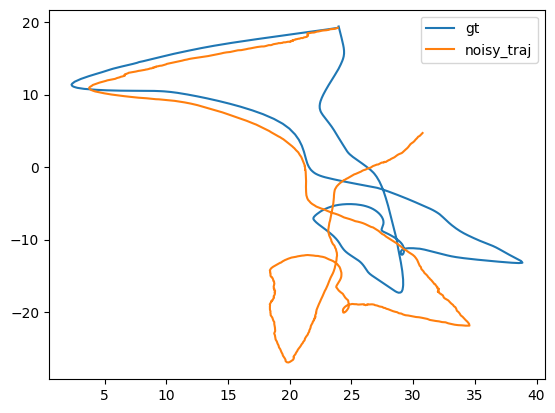

In [4]:
# load a dataset and add noise to the ground truth
import minslam.data_loader as data_loader
import matplotlib.pyplot as plt
import numpy as np
dataset = data_loader.TartanAirLoader('~/Projects/curly_slam/data/tartanair/scenes/soulcity/Easy/P001/')
color, depth = dataset.read_current_rgbd()
# plt.imshow(color[:,:,::-1])
# plt.imshow(depth.clip(0, 100))
dataset.load_ground_truth()
noisy_traj = dataset.add_noise(dataset.gt, [2e-4, 2e-4], [1e-3, 1e-3])
gt_poses = np.array([x.t for x in dataset.gt])
noisy_traj_poses = np.array([x.t for x in noisy_traj])
plt.plot(gt_poses[:,0], gt_poses[:,1], label='gt')
plt.plot(noisy_traj_poses[:,0], noisy_traj_poses[:,1], label='noisy_traj')
plt.legend()

In [1]:
# frontend
from minslam.data_loader import load_dataset
from minslam.frontend import Frontend
from minslam.params import Params
import matplotlib.pyplot as plt
import numpy as np
import cv2

params = Params('../params/tartanair.yaml')

dataset = load_dataset(params)
dataset.load_ground_truth()
noisy_odom = dataset.add_noise(dataset.gt, [2e-4, 2e-4], [1e-3, 1e-3])
dataset.set_odometry(noisy_odom)
frontend = Frontend(params)

Adding noise, seed=54099


In [6]:
pose = dataset.read_current_odometry()
while not frontend.keyframe_selection(pose):
    dataset.load_next_frame()
    pose = dataset.read_current_odometry()
color, depth = dataset.read_current_rgbd()
frontend.add_keyframe(pose, color, depth)
print(f'--- Added keyframe {frontend.frame_id} ---')
frontend.extract_features()
frontend.match_features()
frontend.eliminate_outliers()
frontend.plot_matches()

--- Added keyframe 2 ---


TypeError: 'NoneType' object is not iterable

In [5]:
frontend.curr_matches